In [1]:

"""
Assume all data from `start_date` to `end_date` is available for the following pairs:

Major Pairs:
['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD', 'USDJPY', 'USDCAD', 'USDCHF']

Minor Pairs:
['EURGBP', 'EURAUD', 'EURJPY', 'EURCHF', 'EURCAD', 'EURNZD', 'GBPAUD', 'GBPJPY', 'GBPCHF', 'GBPCAD', 'GBPNZD', 'AUDJPY', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'NZDJPY', 'NZDCHF', 'NZDCAD', 'CADJPY', 'CADCHF', 'CHFJPY']
"""

# from trading_utils.constants import forex_major_pairs, forex_minor_pairs
# from trading_utils.get_forex_data import get_forex_data_by_pair

# start_date = "2003-01-01"
# end_date = "2025-01-01"

# print(forex_major_pairs)
# print(forex_minor_pairs)



"\nAssume all data from `start_date` to `end_date` is available for the following pairs:\n\nMajor Pairs:\n['EURUSD', 'GBPUSD', 'AUDUSD', 'NZDUSD', 'USDJPY', 'USDCAD', 'USDCHF']\n\nMinor Pairs:\n['EURGBP', 'EURAUD', 'EURJPY', 'EURCHF', 'EURCAD', 'EURNZD', 'GBPAUD', 'GBPJPY', 'GBPCHF', 'GBPCAD', 'GBPNZD', 'AUDJPY', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'NZDJPY', 'NZDCHF', 'NZDCAD', 'CADJPY', 'CADCHF', 'CHFJPY']\n"

In [2]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path(".").parent

EXPORT_DIR = PROJECT_ROOT / "exports" / "forex"

INSPECT_SYMBOLS = [
    "EURUSD",
    "USDJPY",
    "EURJPY",
]

In [3]:
def load_regime_csv(symbol: str) -> pd.DataFrame:
    path = EXPORT_DIR / f"{symbol}_regime_ohlcv.csv"
    df = pd.read_csv(path, parse_dates=["datetime"])
    df = df.set_index("datetime").sort_index()
    return df

REGIME_DF = {}
for sym in INSPECT_SYMBOLS:
    try:
        REGIME_DF[sym] = load_regime_csv(sym)
    except FileNotFoundError as e:
        print(e)

In [4]:
REGIME_DF

{'EURUSD':                open     high      low    close  volume       ret    rv_20d  \
 datetime                                                                     
 2020-01-30  1.10096  1.10394  1.10064  1.10311  145927  0.001933  0.035880   
 2020-01-31  1.10304  1.10955  1.10169  1.10948  163896  0.005758  0.042269   
 2020-02-03  1.10942  1.10942  1.10346  1.10595  155124 -0.003187  0.040764   
 2020-02-04  1.10595  1.10642  1.10329  1.10442  132274 -0.001384  0.038911   
 2020-02-05  1.10445  1.10479  1.09937  1.09987  139885 -0.004128  0.038791   
 ...             ...      ...      ...      ...     ...       ...       ...   
 2024-12-23  1.04274  1.04453  1.03842  1.04048  185785 -0.002371  0.076091   
 2024-12-24  1.04033  1.04099  1.03834  1.03915  124549 -0.001279  0.076147   
 2024-12-26  1.03977  1.04301  1.03904  1.04206  115109       NaN       NaN   
 2024-12-27  1.04170  1.04441  1.04049  1.04208  163677  0.000019  0.071499   
 2024-12-30  1.04282  1.04584  1.03716  1.

Symbol: EURJPY
Date range: 2020-01-30 -> 2021-06-30
Macro states in window: ['y0_c0', 'y0_c1']
Vol states in window: ['risk_off', 'risk_on', 'unknown']
Final regimes in window: ['y0_c0|risk_on', 'y0_c0|unknown', 'y0_c1|risk_off', 'y0_c1|risk_on']


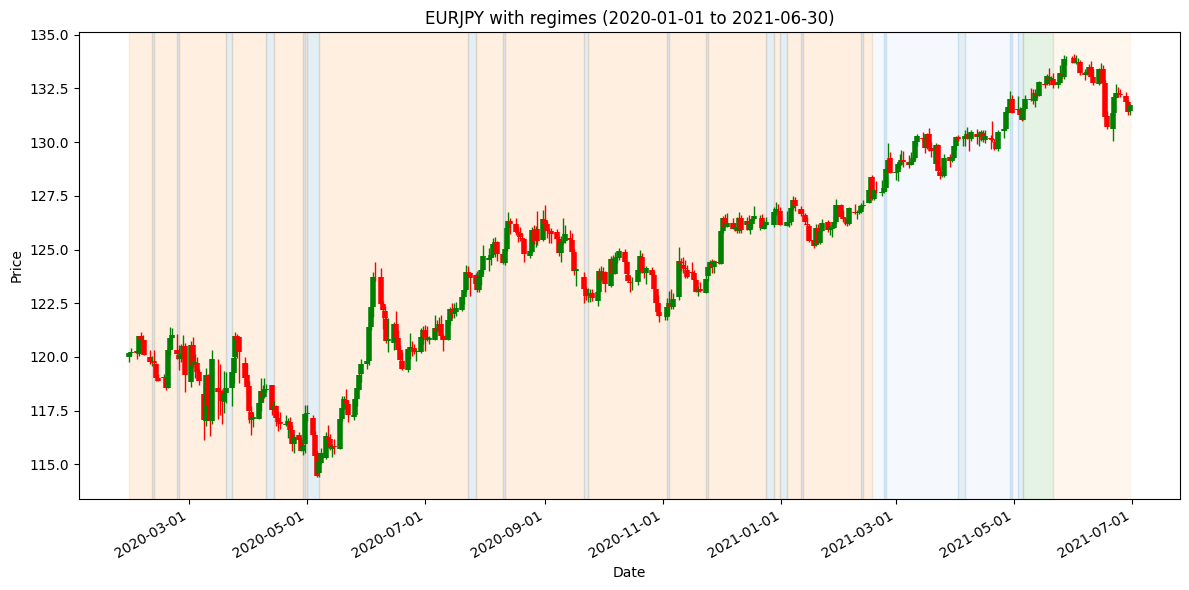

In [6]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("/home/matrillo/apps/regime-classification")
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Ensure fresh import
sys.modules.pop("utils.inspect_fx_regime_exports", None)
sys.modules.pop("utils", None)

from utils.inspect_fx_regime_exports import plot_regime_candles

plot_regime_candles("EURJPY", "2020-01-01", "2021-06-30")